In [689]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

In [690]:
CURR_DIR_PATH = os.getcwd()
FILE_PATH = CURR_DIR_PATH + \
    '/data/ml_supplementary_data/output/'

In [691]:
regional_data_df = pd.read_csv(f'{FILE_PATH}supplementary_data_fin.csv')
regional_data_df

,Year,Region,industry_energy_use_in_tj,oil_gas_heating_of_floor_area_in_m2,coal_coke_heating_of_floor_area_in_m2,wood_peat_heating_of_floor_area_in_m2,other_heating_of_floor_area_in_m2,wood_fuels_in_1000m3,population,utilized_agric_area_in_1000_hectares,cattle,pigs,poultry,sheep,goats,tons_of_ship_cargo,num_of_ship_passengers,num_of_registered_automobiles
0,2016,Uusimaa,64814,15930478,344298,2113456,3928233,1245,1638293,181.4,23350,30359,8916,8465,170,40378664.0,12321495.0,973321
1,2016,Southwest Finland,14857,10620096,147671,2694123,2020792,621,475543,294.3,38300,344685,4650891,21175,296,10140308.0,2875211.0,347910
2,2016,Kanta-Haeme,6926,3164731,64917,1172855,705433,439,173781,104.0,22196,47156,170434,4570,35,0.0,0.0,139057
3,2016,Paeijaet-Haeme,9602,3387992,17658,1335253,663937,754,208574,82.3,22444,29363,13742,4576,55,0.0,0.0,150235
4,2016,Kymenlaakso,46131,4906941,59981,993726,1173996,1240,170770,84.0,15827,8146,8202,3241,14,12319480.0,0.0,132023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2022,Central Ostrobothnia,8416,1366143,3147,636005,479298,277,67805,58.1,47944,11413,0,3658,0,0.0,0.0,62476
129,2022,North Ostrobothnia,51882,4051787,35680,3228521,1698316,1818,416543,240.3,131137,51259,16465,10832,117,7878711.0,0.0,335221
130,2022,Kainuu,3505,742403,991,1046019,314316,477,70521,25.5,16362,0,0,2604,6,0.0,0.0,66313
131,2022,Lapland,41039,2890625,6810,1854108,997050,1095,175795,43.6,26765,0,0,12561,61,4164505.0,2415.0,165950


In [692]:
emission_data_df = pd.read_csv(CURR_DIR_PATH + '/data/transformed_finland_data/finland_regions_emissions.csv')
emission_data_df = emission_data_df[['Year', 'Region', 'Total Emissions']]
regional_data_df = pd.merge(emission_data_df, regional_data_df, on=['Year', 'Region'], how='inner')
regional_data_df 

,Year,Region,Total Emissions,industry_energy_use_in_tj,oil_gas_heating_of_floor_area_in_m2,coal_coke_heating_of_floor_area_in_m2,wood_peat_heating_of_floor_area_in_m2,other_heating_of_floor_area_in_m2,wood_fuels_in_1000m3,population,utilized_agric_area_in_1000_hectares,cattle,pigs,poultry,sheep,goats,tons_of_ship_cargo,num_of_ship_passengers,num_of_registered_automobiles
0,2016,Central Finland,1830.3,28908,4480801,88678,2585950,946627,1883,273910,94.0,48548,9592,48598,9129,31,0.0,0.0,198726
1,2017,Central Finland,1734.4,36520,4244750,88679,2591013,952194,2020,273779,93.7,47085,8449,48433,9696,17,0.0,0.0,203376
2,2018,Central Finland,1766.8,49323,4204915,88679,2566023,895020,2116,273283,93.8,46456,8069,85829,9236,13,0.0,0.0,208036
3,2019,Central Finland,1690.9,52751,4050750,88271,2550438,913155,2028,272898,93.7,45767,8052,52132,8906,14,0.0,0.0,212112
4,2020,Central Finland,1558.8,45788,4002520,86357,2575805,991718,1879,272617,93.5,44580,7972,51148,8769,13,0.0,0.0,215871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2018,Aaland,242.9,255,847414,2428,197962,171010,74,29789,16.4,8965,0,20771,10410,0,199985.0,3477970.0,28141
129,2019,Aaland,233.6,261,838863,2428,198752,176864,64,29884,16.5,8251,0,19360,8488,0,247680.0,3373823.0,29912
130,2020,Aaland,196.8,234,851359,2548,204069,174241,66,30129,16.3,8451,133,16103,8697,88,220327.0,962752.0,30519
131,2021,Aaland,192.9,112,838458,2293,195497,172754,78,30344,16.3,8857,0,21938,7893,89,200349.0,1208744.0,30934


In [693]:
X = regional_data_df.drop(['Total Emissions'], axis=1)
y = regional_data_df['Total Emissions']

In [694]:
label_encoder = LabelEncoder()
X['Region'] = label_encoder.fit_transform(X['Region'])

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [696]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [697]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [698]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Average Cross-Validation R2 Score: {np.mean(cv_scores)}")

Cross-Validation R2 Scores: [0.99076829 0.9963861  0.979088   0.97877077 0.98795603]
Average Cross-Validation R2 Score: 0.9865938378999838


In [699]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [700]:
y_pred = model.predict(X_test_scaled)

In [703]:
future_data = X_test.copy()
future_data['Year'] = 2023 

regions = future_data['Region'].copy()

future_data_scaled = scaler.transform(future_data)
future_predictions = model.predict(future_data_scaled)

predictions_df = pd.DataFrame({
    'Region': label_encoder.inverse_transform(regions),
    'Predicted Emissions for 2023': future_predictions
})

predictions_df = predictions_df.sample(4)

In [704]:
mse = mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 7618.421266666777
R2 Score: 0.99452109680316


C:\Users\PålEgilRunde\AppData\Local\Temp\ipykernel_21208\139495136.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', len(regions_with_predictions))  # Use a colormap with enough distinct colors


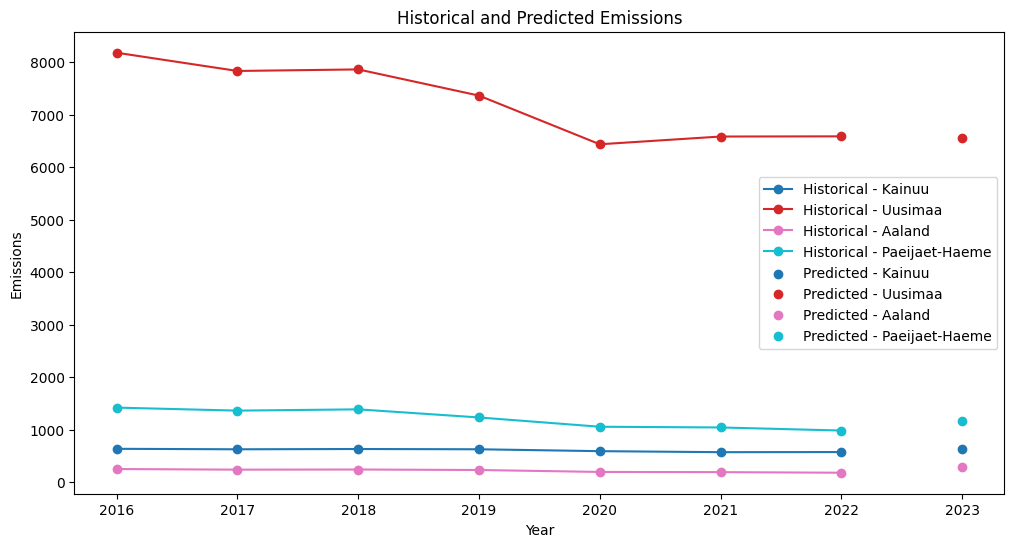

: 

In [705]:
regions_with_predictions = predictions_df['Region'].unique()
filtered_regional_data_df = regional_data_df[regional_data_df['Region'].isin(regions_with_predictions)]

# color map to assign a unique color to each region
color_map = plt.cm.get_cmap('tab10', len(regions_with_predictions))  # Use a colormap with enough distinct colors
region_colors = {region: color_map(i) for i, region in enumerate(regions_with_predictions)}

# historical emissions
plt.figure(figsize=(12, 6))
for region in regions_with_predictions:
    subset = filtered_regional_data_df[filtered_regional_data_df['Region'] == region]
    plt.plot(subset['Year'], subset['Total Emissions'], marker='o', label=f'Historical - {region}', color=region_colors[region])

# predicted emissions
predicted_data = predictions_df.copy()
predicted_data['Year'] = 2023
for region in regions_with_predictions:
    plt.scatter(predicted_data[predicted_data['Region'] == region]['Year'], 
                predicted_data[predicted_data['Region'] == region]['Predicted Emissions for 2023'], 
                label=f'Predicted - {region}', marker='o', color=region_colors[region])

plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Historical and Predicted Emissions')
plt.legend()
plt.show()